In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/miguel.postigo/Desktop/carpeta/programacion/python/linkedin/esencial/base_datos_2008.csv")
#[]

In [3]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(100000)
Y = df["ArrDelay"] #VARIABLE RESPUESTA/INDEPENDIENTE - Retraso en la llegada
X = df[["DepDelay"]] #VARIABLE DEPENDIENTE/EXPLICATIVA/REGRESORA - Retraso en la llegada

In [5]:
Y

122899     -4.0
2333213    22.0
2735157    11.0
1594196     1.0
1777030    15.0
           ... 
6591766   -15.0
5835658   -10.0
1692453   -11.0
3921674   -15.0
4898597     9.0
Name: ArrDelay, Length: 100000, dtype: float64

In [6]:
X

,DepDelay
122899,-6.0
2333213,0.0
2735157,27.0
1594196,0.0
1777030,22.0
...,...
6591766,-1.0
5835658,-6.0
1692453,-4.0
3921674,-1.0


In [4]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [8]:
Y_pred = regr.predict(X)
print("Coeficientes: ",regr.coef_) #BETA
print('Termino indep: ', regr.intercept_) #Este es el valor donde corta el eje Y (en X=0)
print("R cuadrado: ",r2_score(Y, Y_pred))

Coeficientes:  [1.0183433]
Termino indep:  -1.8856151631635658
R cuadrado:  0.8649804523941369


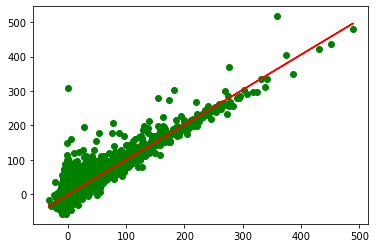

In [14]:
plt.scatter(X[1:10000],Y[1:10000],color = "green")
plt.plot(X[1:10000],Y_pred[1:10000],color = "red")
plt.show()

In [20]:
X = df[["AirTime","Distance","TaxiIn","TaxiOut"]]

df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data = df[["Month","DayofMonth","DayOfWeek","Origin","Dest"]])
X = dummies.add(X,fill_value = 0)

In [16]:
X.head()

,AirTime,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,DayofMonth_1,DayofMonth_10,...,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,TaxiIn,TaxiOut
122899,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0
2333213,310.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0
2735157,148.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0
1594196,136.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,20.0
1777030,95.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0


In [17]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=648)

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado: ",r2_score(Y, Y_pred))

R cuadrado:  0.18597746695717554


In [22]:
X = X.add(df[["DepDelay"]],fill_value = 0)

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)
print("R cuadrado: ",r2_score(Y, Y_pred))

R cuadrado:  0.971774439567676
